In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Adama Traoré,es ESP,"FW,MF",Wolves+Wolves+Barcelona,eng Premier League+eng Premier League+es La Liga,27.0,1996.0,102.0,54.0,5594.0,62.1,0.08,0.16,0.08,0.16,0.11,0.31,0.11,0.31,457.0,309.0,68.0,127.0,28.0,43.14,0.72,4.47,17.38,22.75,3.86,43.14,7.36,4.97,2.04,29.00,296.65,162.35,6.80,3.30,2.00,3.67,2.03,33.98,8.31,15.410000,0.730000,2.50,0.00,0.84,0.13,0.34,2.50,0.14,0.00,0.01,0.03,0.03,0.00,1260.0,1875.0,67.0,18531.0,4282.0,741.0,931.0,80.0,370.0,564.0,66.0,87.0,166.0,52.0,0.08,0.17,0.15,-0.10,1.67,1.25,1.21,0.72,2.33,30.19,29.64,0.45,0.01,0.09,0.06,4.96,0.40,0.00,0.00,0.00,0.0,20.29,0.10,1.50,6.010000,1.480000,0.23,0.94,0.32,-2.1,-2.1,61.0,0.10,0.00,0.00,0.85,1.01,0.11,0.62,0.55,0.00,0.02,3.56,1.32,0.84,3,3,1,0,0,0
1,1,Marcel Sabitzer,at AUT,MF,RB Leipzig+RB Leipzig+Bayern Munich+Manchester...,de Bundesliga+eng Premier League+de Bundesliga,29.0,1994.0,80.0,46.0,4235.0,47.1,0.21,0.34,0.13,0.25,0.25,0.31,0.17,0.25,38.0,22.0,58.0,15.0,39.0,71.53,1.78,12.23,40.19,19.51,2.02,71.44,0.81,0.47,0.32,38.74,162.38,72.17,1.27,1.38,0.17,1.32,0.98,49.37,3.82,11.670000,1.170000,2.38,0.02,0.00,0.17,0.08,2.38,0.26,0.00,0.00,0.02,0.00,0.00,2306.0,2878.0,80.0,35602.0,10553.0,1258.0,1433.0,88.0,806.0,954.0,84.0,147.0,272.0,54.0,0.12,0.12,0.17,0.00,1.19,5.12,1.51,0.24,7.05,61.10,57.54,3.04,1.51,0.12,0.53,1.12,1.38,0.04,0.02,0.00,0.0,48.96,0.53,1.21,9.360000,2.940000,0.29,0.94,0.24,-1.5,-2.3,40.0,0.15,0.00,0.00,1.15,1.53,0.36,0.87,1.42,0.04,0.00,5.95,0.94,1.40,3,1,0,0,0,3
2,2,Ruben Aguilar,fr FRA,"DF,MF",Monaco,fr Ligue 1,30.0,1993.0,81.0,63.0,5537.0,61.5,0.02,0.10,0.02,0.10,0.02,0.13,0.02,0.13,54.0,24.0,44.0,29.0,54.0,78.79,2.81,17.69,38.51,23.17,1.77,78.79,0.88,0.39,0.47,44.13,224.29,116.07,2.67,2.10,0.18,1.38,0.38,47.

In [4]:
# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2023

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
0,0,0,Brenden Aaronson,us USA,"MF,FW",Leeds United,eng Premier League,21,2000,36,28,2372,26.4,0.04,0.15,0.04,0.15,0.15,0.31,0.15,0.31,100.0,34.0,34.0,48.0,48.0,43.30,0.45,4.39,18.75,20.98,2.73,43.30,3.79,1.29,1.82,25.98,138.11,58.03,1.63,1.29,0.49,2.69,3.11,29.05,5.72,3.600000,0.270000,2.16,0.64,0.27,0.19,0.30,0.04,0.11,0.04,0.00,0.04,0.04,0.04,592.0,797.0,74.3,7577.0,2182.0,346.0,423.0,81.8,150.0,195.0,76.9,25.0,65.0,38.5,0.11,0.16,0.10,-0.05,1.74,1.78,0.61,0.15,3.26,30.19,26.93,3.22,0.98,0.30,0.08,2.73,0.19,1.44,0.64,0.53,0.04,22.42,0.04,1.02,1.560000,0.340000,0.02,0.11,0.09,-2.9,-2.9,17.0,0.08,0.00,0.00,0.61,2.08,0.23,0.19,0.68,0.00,0.00,4.85,0.30,1.48
4,4,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34,1987,37,37,3330,37.0,0.03,0.08,0.03,0.08,0.06,0.09,0.06,0.09,37.0,21.0,56.8,14.0,37.8,66.46,6.51,29.41,34.46,3.32,1.05,66.46,1.00,0.57,0.38,46.57,293.81,165.49,1.08,0.57,0.08,0.73,0.62,40.51,0.27,1.160000,0.190000,0.92,0.00,0.05,0.14,0.00,0.05,0.11,0.00,0.05,0.03,0.00,0.00,1679.0,2031.0,82.7,32967.0,13407.0,490.0,571.0,85.8,1006.0,1117.0,90.1,155.0,279.0,55.6,0.05,0.03,0.02,0.03,0.35,4.19,0.14,0.00,5.81,54.89,50.86,3.84,3.14,0.00,0.81,0.14,0.27,0.00,0.00,0.00,0.00,45.38,0.19,0.54,0.860000,0.080000,0.03,0.33,0.07,-1.4,-1.4,64.6,0.16,0.00,0.00,1.32,0.76,0.05,1.73,1.35,0.00,0.00,7.11,2.51,1.38
5,5,5,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,22,1999,30,24,2137,23.7,0.08,0.17,0.08,0.17,0.06,0.18,0.06,0.18,76.0,43.0,56.6,28.0,36.8,63.97,1.10,10.00,38.57,17.26,0.97,63.97,3.21,1.81,1.18,49.96,289.49,138.99,2.45,2.53,0.30,1.52,0.84,44.98,4.68,2.910000,0.130000,2.49,0.17,0.13,0.04,0.00,0.08,0.13,0.00,0.00,0.00,0.00,0.00,1043.0,1257.0,83.0,18273.0,4649.0,465.0,536.0,86.8,421.0,494.0,85.2,122.0,169.0,72.2,0.08,0.12,0.11,-0.04,1.52,5.23,1.10,0.34,6.37,53.04,50.34,2.53,0.84,0.34,0.25,1.48,0.68,0.42,0.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (DF) and midfielders (MF) from the 'final_player' DataFrame
defender_players = final_player[final_player['Pos'].isin(['DF', 'DF,MF'])]
newbie = newbie[newbie['Pos'].isin(['DF', 'DF,MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF', 'DF,MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF', 'DF,MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF', 'DF,MF','DF,FW'])]

# Reset the index if needed
defender_players = defender_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [6]:
Cancelo=defender_players[defender_players['Player']=='João Cancelo']
Cancelo

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
191,461,João Cancelo,pt POR,"DF,MF",Manchester City+Manchester City+Bayern Munich,eng Premier League+eng Premier League+de Bunde...,29.0,1994.0,96.0,90.0,7812.0,86.8,0.07,0.24,0.07,0.24,0.08,0.26,0.08,0.26,312.0,167.0,54.0,133.0,43.0,98.7,2.12,17.64,49.79,32.05,2.93,98.7,3.59,1.92,1.53,61.72,308.22,161.96,3.78,3.06,1.15,1.37,0.78,71.04,7.31,13.29,2.62,2.57,0.06,0.26,0.27,0.07,2.57,0.4,0.02,0.05,0.04,0.01,0.0,6373.0,7574.0,84.0,100252.0,27497.0,3627.0,3900.0,93.0,2158.0,2579.0,84.0,455.0,736.0,62.0,0.17,0.15,0.19,0.02,1.22,6.74,2.54,0.4,8.34,87.26,78.04,9.01,1.51,0.37,0.91,3.18,7.49,0.01,0.01,0.0,0.0,73.43,0.21,1.36,5.67,1.4,0.33,1.37,0.38,-1.1,-1.1,41.0,0.09,0.01,0.0,0.65,0.98,0.39,0.61,0.57,0.01,0.0,2.61,0.66,0.94,3,3,0,0,0,1


In [7]:
Cancelo_2023=player_2023[player_2023['Player']=='João Cancelo']
Cancelo_2023

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
614,2381,18,João Cancelo,pt POR,"DF,FW",Manchester City+Bayern Munich,eng Premier League+de Bundesliga,28,1994,32,27,2286,25.4,0.12,0.31,0.12,0.31,0.06,0.27,0.06,0.27,125.0,64.0,51.0,49.0,38.0,93.58,2.01,17.68,46.93,29.8,3.35,93.58,4.92,2.52,1.93,58.03,338.27,189.72,4.84,2.48,1.57,1.5,0.91,67.76,8.46,37.23622,7.76378,2.4,0.0,0.12,0.24,0.12,0.04,0.55,0.0,0.08,0.0,0.0,0.0,1749.0,2081.0,84.0,28179.0,7419.0,979.0,1051.0,93.0,617.0,738.0,84.0,130.0,210.0,62.0,0.2,0.13,0.17,0.07,0.98,5.31,2.24,0.59,6.57,81.93,73.74,8.07,1.26,0.2,1.02,3.15,6.81,0.0,0.0,0.0,0.0,68.86,0.12,1.26,14.795276,3.440945,0.1,0.43,0.05,1.5,1.5,32.0,0.04,0.0,0.0,0.71,1.81,1.34,0.12,0.12,0.0,0.0,2.13,0.91,1.97


In [8]:
Cancelo_2022=player_2022[player_2022['Player']=='João Cancelo']
Cancelo_2022

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
95,379,448.0,João Cancelo,pt POR,DF,Manchester City,eng Premier League,27.0,1994.0,36.0,36.0,3227.0,35.9,0.03,0.22,0.03,0.22,0.11,0.26,0.11,0.26,106.0,56.0,52.8,50.0,47.2,104.99,1.87,17.21,53.79,34.68,2.81,104.99,2.95,1.56,1.39,67.16,315.13,161.14,3.48,3.59,1.0,1.25,0.67,76.57,7.52,3.51,0.5,2.73,0.03,0.22,0.45,0.06,0.03,0.36,0.03,0.03,0.08,0.0,0.0,2809.0,3365.0,83.5,44538.0,12620.0,1610.0,1732.0,93.0,938.0,1130.0,83.0,208.0,346.0,60.1,0.19,0.15,0.18,0.04,1.09,8.58,2.67,0.33,9.94,93.73,84.09,9.42,1.53,0.58,1.14,3.45,7.86,0.03,0.03,0.0,0.0,78.25,0.22,1.64,2.26,0.64,0.01,0.04,0.05,-3.0,-3.0,65.2,0.08,0.0,0.0,0.42,0.19,0.0,0.28,0.28,0.0,0.0,1.64,0.42,0.22


In [9]:
Cancelo_2021=player_2021[player_2021['Player']=='João Cancelo']
Cancelo_2021

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
101,378,435.0,João Cancelo,pt POR,"DF,MF",Manchester City,eng Premier League,26.0,1994.0,28.0,27.0,2299.0,25.5,0.08,0.2,0.08,0.2,0.06,0.24,0.06,0.24,81.0,47.0,58.0,34.0,42.0,94.94,2.59,18.2,47.02,30.59,2.67,94.94,3.18,1.84,1.33,57.73,268.55,135.45,3.14,2.9,0.94,1.41,0.82,66.51,5.88,3.21,0.47,2.51,0.16,0.47,0.04,0.04,0.0,0.31,0.04,0.04,0.04,0.04,0.0,1815.0,2128.0,85.3,27535.0,7458.0,1038.0,1117.0,92.9,603.0,711.0,84.8,117.0,180.0,65.0,0.12,0.18,0.22,-0.06,1.65,5.57,2.67,0.31,7.84,83.45,73.8,9.37,1.73,0.24,0.47,2.82,7.65,0.0,0.0,0.0,0.0,71.18,0.27,1.06,1.37,0.43,0.06,0.18,0.05,0.4,0.4,44.2,0.16,0.04,0.0,0.9,1.25,0.0,1.57,1.41,0.04,0.0,4.47,0.75,0.94


In [10]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_percentile_ranks = round(players_percentile_ranks.iloc[[191]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
191         74.0       93.0        75.0          93.0      84.0          96.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
191        85.0            96.0               100.0          100.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
191            44.0             100.0               67.0           100.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
191                     5.0                    18.0                    98.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
191                   100.0                    97.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
191                      100.0                       98.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
191                  99.0                     97.0            99.0   

     Tota

In [11]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2023_percentile_ranks = round(players_percentile_ranks.iloc[[614]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2023_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
614         61.0       29.0        62.0          29.0      68.0          73.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
614        70.0            73.0                68.0           52.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
614             6.0              78.0               95.0            23.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
614                    37.0                    38.0                     9.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
614                    71.0                    62.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
614                       23.0                       93.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
614                  83.0                     97.0            16.0   

     Tota

In [12]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2022_percentile_ranks = round(players_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2022_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
95         52.0       87.0        52.0          88.0      44.0          80.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
95        45.0            80.0                69.0           58.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
95            13.0              78.0               94.0            62.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
95                    17.0                    13.0                    60.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
95                    89.0                    67.0                       62.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
95                       55.0                  44.0                     64.0   

    Carries_per_90  Total_Distance_per_90  \
95            37.0     

In [13]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2021_percentile_ranks = round(players_percentile_ranks.iloc[[101]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2021_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
101         11.0       12.0        11.0          12.0       6.0          26.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
101         6.0            27.0                78.0           83.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
101            66.0              69.0               34.0            31.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
101                    40.0                    37.0                    39.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
101                    57.0                     5.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
101                       31.0                       59.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
101                  65.0                     52.0            13.0   

     Tota

In [14]:
import pandas as pd






params=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_percentile_ranks = round(players_percentile_ranks.iloc[[191]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_percentile_ranks)


     G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
191       93.0                   100.0                        98.0   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
191                99.0                         98.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
191                        98.0                     99.0            95.0   

     xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
191       97.0               90.0               98.0   

     Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
191                       100.0                         75.0   

     Progressive_Passes_per_90  Crosses_per_90  
191                      100.0            84.0  


In [15]:
cancelo_percentile_ranks_list = cancelo_percentile_ranks.values.flatten().tolist()

cancelo_percentile_ranks_list

[93.0,
 100.0,
 98.0,
 99.0,
 98.0,
 98.0,
 99.0,
 95.0,
 97.0,
 90.0,
 98.0,
 100.0,
 75.0,
 100.0,
 84.0]

In [16]:

params_2023=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params_2023].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2023_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
95       31.0                    37.0                        58.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
95                72.0                         38.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
95                        10.0                     24.0            23.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
95        7.0                1.0               47.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
95                        26.0                         15.0   

    Progressive_Passes_per_90  Crosses_per_90  
95                       61.0            26.0  


In [17]:
cancelo_2023_percentile_ranks_list = cancelo_2023_percentile_ranks.values.flatten().tolist()

cancelo_2023_percentile_ranks_list

[31.0,
 37.0,
 58.0,
 72.0,
 38.0,
 10.0,
 24.0,
 23.0,
 7.0,
 1.0,
 47.0,
 26.0,
 15.0,
 61.0,
 26.0]

In [18]:

params_2022=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params_2022].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2022_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
95       89.0                   100.0                        96.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
95               100.0                         99.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
95                        94.0                     95.0            94.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
95       95.0               88.0               99.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
95                       100.0                         73.0   

    Progressive_Passes_per_90  Crosses_per_90  
95                      100.0            87.0  


In [19]:
cancelo_2022_percentile_ranks_list = cancelo_2022_percentile_ranks.values.flatten().tolist()

cancelo_2022_percentile_ranks_list

[89.0,
 100.0,
 96.0,
 100.0,
 99.0,
 94.0,
 95.0,
 94.0,
 95.0,
 88.0,
 99.0,
 100.0,
 73.0,
 100.0,
 87.0]

In [20]:

params_2021=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params_2021].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2021_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
95       71.0                     8.0                         5.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
95                10.0                         16.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
95                         6.0                     25.0            24.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
95        2.0               15.0                9.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
95                         9.0                         16.0   

    Progressive_Passes_per_90  Crosses_per_90  
95                        8.0             5.0  


In [21]:
cancelo_2021_percentile_ranks_list = cancelo_2021_percentile_ranks.values.flatten().tolist()

cancelo_2021_percentile_ranks_list

[71.0,
 8.0,
 5.0,
 10.0,
 16.0,
 6.0,
 25.0,
 24.0,
 2.0,
 15.0,
 9.0,
 9.0,
 16.0,
 8.0,
 5.0]

In [22]:
image_path = "Cancelo.png"
fdj_cropped = Image.open(image_path)


In [23]:
len(params)

15

In [24]:
len(params_2022)

15

In [25]:
split_params = [param.replace('_', '\n') for param in params]
split_params_2022 = [param.replace('_', '\n') for param in params_2022]


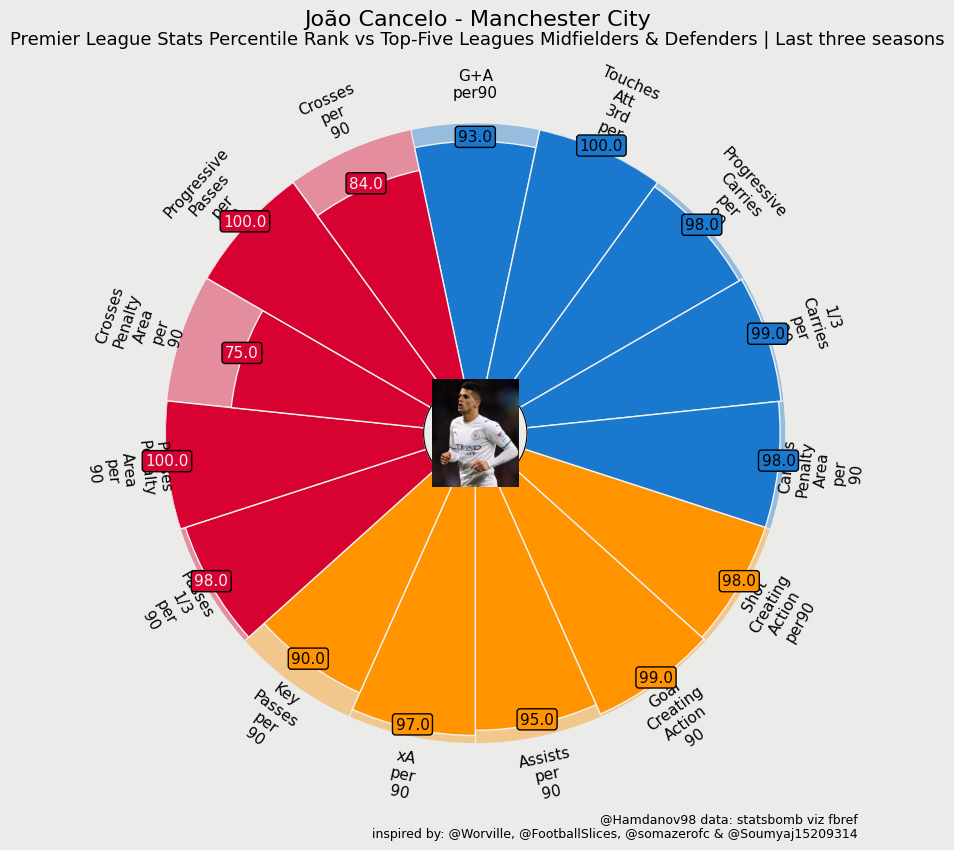

In [26]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    cancelo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "João Cancelo - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Midfielders & Defenders | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo/Cancelo_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


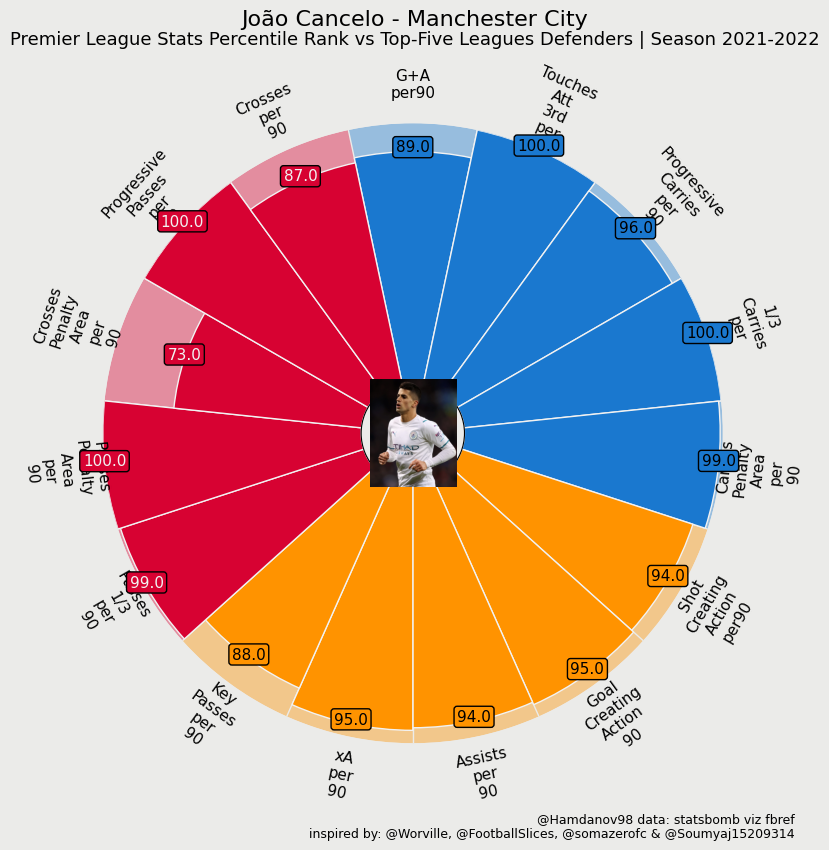

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params_2022, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    cancelo_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "João Cancelo - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | Season 2021-2022",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo_2022/Cancelo_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [28]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_defender_players = defender_players.select_dtypes(include=np.number)
numerical_defender_players = numerical_defender_players.iloc[:, 9:]
numerical_defender_players = numerical_defender_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_defender_players = (numerical_defender_players - numerical_defender_players.mean()) / numerical_defender_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_defender_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.2531250379396551,
 0.4296644236595682,
 0.49086738104184535,
 0.5388882341904317,
 0.5850024685318832,
 0.6165743007171599,
 0.647358647388815,
 0.6718181366446971,
 0.6915833590677858,
 0.7088210156401683,
 0.7258540596794221,
 0.7411795643326192,
 0.755242241379231,
 0.7683086844980416,
 0.7807753929521248]

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_defender_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_defender_players.index)



In [30]:
# Remove Declan Rice's row and store it in a separate variable
cancelo_data = transformed_df.iloc[191].copy()
transformed_df = transformed_df.drop(transformed_df.index[191])

# Compute cosine similarity between each player and Declan Rice
similarity_scores = cosine_similarity(transformed_df, cancelo_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_cancelo'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_cancelo', ascending=False).head(10)
top_similar_players

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,similarity_to_cancelo
111,10.288961,8.346356,2.361884,1.333661,1.498276,0.173956,-1.227649,-0.220581,0.522412,-0.251681,1.201103,1.736845,-0.067382,3.257021,0.781961,0.835711
259,12.843011,8.782894,4.282765,-6.641816,-4.369662,0.345828,0.958684,-2.377832,4.417364,3.062267,-3.090041,-0.892376,0.300520,0.333050,-1.899915,0.820074
246,4.996627,11.256720,-1.603329,-1.553057,-0.991485,-0.463191,0.216946,-0.759302,-2.502764,0.918799,2.051579,-0.534728,0.262322,-0.597911,0.113413,0.788199
118,12.071345,11.679840,1.271907,1.786421,4.622816,-2.712809,-1.238878,2.064474,-0.746577,3.482094,0.024808,1.017648,1.169508,0.094557,-1.148743,0.778004
107,3.154637,9.251382,4.730009,2.600233,-2.163484,-1.496291,1.771880,-1.850852,-3.433867,1.710040,0.038727,0.570485,0.404319,2.050898,-0.499177,0.753008
202,8.695898,1.500926,-0.660478,-3.758421,0.032534,2.368036,4.859763,0.032174,-0.106997,1.704617,0.380288,-0.009688,-0.555422,0.390888,-0.693046,0.743165
119,10.463678,7.585566,-1.650413,-4.115944,2.190160,-0.470082,-1.519919,1.447505,2.626210,0.586889,-1.395725,-1.507401,-0.036720,-0.447936,-0.263814,0.738129
38,7.611788,6.762628,-1.357141,2.348862,-1.040947,2.008262,-1.524063,0.611218,2.975153,0.054511,-0.409087,0.961704,-2.573113,-0.009813,-0.628330,0.728965
210,8.679891,2.466195,0.075416,-1.585853,0.049237,0.424826,4.556582,-1.359795,2.225258,-1.623982,1.301374,1.242390,1.643039,-0.407390,0.076485,0.723197
91,5.396682,2.099660,-0.458273,-1.903617,-1.379411,2.124342,5.152019,1.672111,-1.335852,-1.094230,1.226922,1.686023,-0.348732,1.327480,-0.008124,0.722886


In [31]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_cancelo', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = defender_players.loc[top_similar_players_indices]
top_similar_players

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
111,271,Reece James,eng ENG,DF,Chelsea,eng Premier League,23.0,1999.0,74.0,61.0,5481.0,60.9,0.11,0.31,0.11,0.31,0.09,0.30,0.09,0.30,138.0,92.0,67.0,38.0,28.0,88.08,2.49,18.70,38.79,31.29,2.35,88.08,2.27,1.51,0.62,51.30,242.56,122.35,3.02,2.15,0.79,1.08,0.97,61.69,8.57,3.55,0.31,2.71,0.34,0.15,0.20,0.13,2.71,0.23,0.03,0.02,0.00,0.03,0.00,4047.0,4766.0,85.0,64454.0,16433.0,2106.0,2263.0,93.0,1543.0,1776.0,87.0,286.0,462.0,62.0,0.20,0.20,0.19,-0.01,1.80,3.57,1.95,0.65,6.03,78.26,67.65,10.34,1.33,0.03,0.49,5.63,7.88,1.13,0.56,0.41,0.00,66.45,0.26,1.35,1.43,0.41,1.65,5.87,1.33,1.3,1.3,41.0,0.25,0.02,0.02,1.30,0.90,0.28,0.66,0.79,0.02,0.02,3.48,0.74,1.09,3,3,0,0,0,0
259,642,Alphonso Davies,ca CAN,DF,Bayern Munich,de Bundesliga,22.0,2000.0,71.0,66.0,5545.0,61.6,0.03,0.18,0.03,0.18,0.05,0.21,0.05,0.21,361.0,213.0,59.0,133.0,37.0,84.20,2.44,19.87,40.05,26.28,3.21,84.20,5.86,3.46,2.16,52.49,332.60,194.84,5.03,3.28,1.44,2.58,1.28,54.68,7.95,3.59,0.31,2.97,0.07,0.39,0.03,0.09,2.97,0.26,0.00,0.03,0.00,0.00,0.02,3789.0,4381.0,86.0,57402.0,15495.0,2117.0,2319.0,91.0,1415.0,1582.0,89.0,167.0,263.0,63.0,0.15,0.16,0.18,-0.01,1.61,4.42,1.58,0.29,5.75,71.12,62.01,8.96,1.35,0.10,0.34,1.66,7.61,0.00,0.00,0.00,0.00,61.51,0.14,1.13,0.66,0.27,0.96,2.33,1.59,-1.2,-1.2,45.0,0.05,0.00,0.00,0.26,0.57,0.06,0.41,0.52,0.00,0.00,3.59,0.13,0.16,3,0,0,0,0,3
246,604,Giovanni Di Lorenzo,it ITA,DF,Napoli,it Serie A,29.0,1993.0,106.0,105.0,9366.0,104.1,0.06,0.20,0.06,0.20,0.07,0.20,0.07,0.20,133.0,62.0,47.0,67.0,50.0,81.20,3.12,21.06,40.31,20.47,2.43,81.20,1.28,0.59,0.65,49.87,221.46,124.04,2.34,1.61,0.27,0.73,0.57,56.98,5.07,2.83,0.37,2.35,0.13,0.09,0.13,0.09,2.35,0.28,0.02,0.02,0.03,0.02,0.00,6508.0,7563.0,86.0,101605.0,35833.0,3580.0,3846

In [32]:
defender_players['similarity_to_cancelo']=transformed_df['similarity_to_cancelo']
defender_players[['Player', 'similarity_to_cancelo']]


,Player,similarity_to_cancelo
0,Ruben Aguilar,0.550160
1,Fikayo Tomori,-0.147178
2,Rodrigo Becão,-0.445845
3,Benjamin Pavard,0.531563
4,Nikola Milenković,-0.081563
...,...,...
623,Martin Hongla,-0.387218
624,Souleymane Touré,-0.325057
625,Jere Uronen,-0.181169
626,Yan Valery,0.232631


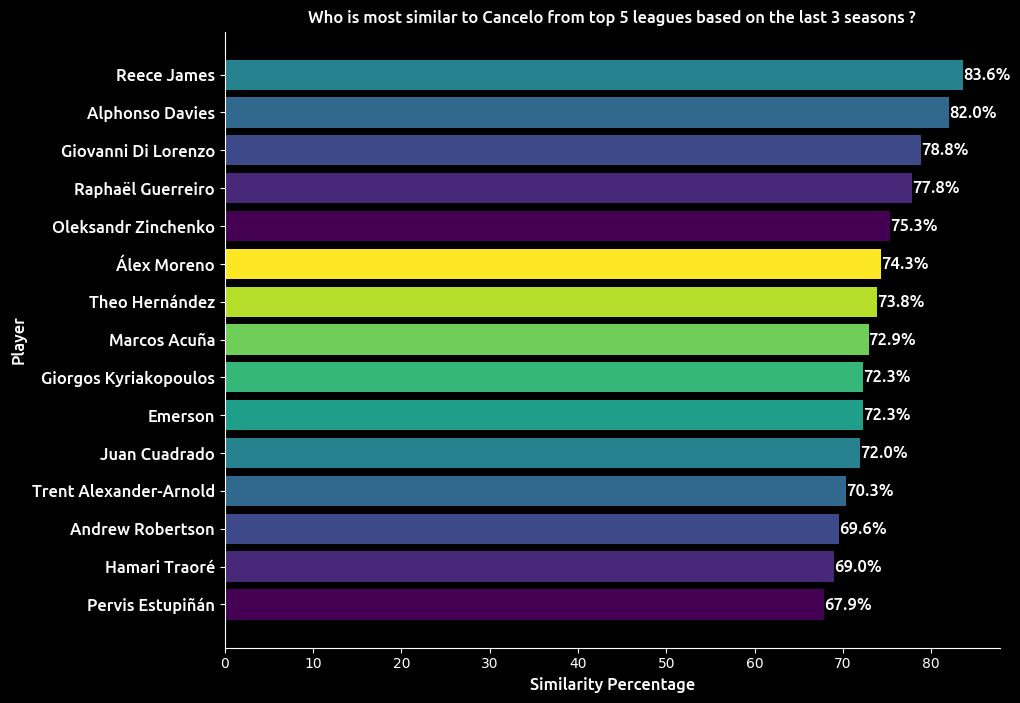

In [33]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the defender_players DataFrame by similarity_to_rice in descending order
defender_players_sorted = defender_players.sort_values(by='similarity_to_cancelo', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defender_players_sorted['Player'].head(15)[::-1], (defender_players_sorted['similarity_to_cancelo'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Cancelo from top 5 leagues based on the last 3 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defender_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Cancelo/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [34]:
player_2023 = player_2023[player_2023['Player'] != 'João Cancelo']
player_2023


,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
0,4,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34,1987,37,37,3330,37.0,0.03,0.08,0.03,0.08,0.06,0.09,0.06,0.09,37.0,21.0,56.8,14.0,37.8,66.46,6.51,29.41,34.46,3.32,1.05,66.46,1.00,0.57,0.38,46.57,293.81,165.49,1.08,0.57,0.08,0.73,0.62,40.51,0.27,1.160000,0.190000,0.92,0.00,0.05,0.14,0.00,0.05,0.11,0.00,0.05,0.03,0.0,0.0,1679.0,2031.0,82.7,32967.0,13407.0,490.0,571.0,85.8,1006.0,1117.0,90.1,155.0,279.0,55.6,0.05,0.03,0.02,0.03,0.35,4.19,0.14,0.00,5.81,54.89,50.86,3.84,3.14,0.00,0.81,0.14,0.27,0.00,0.00,0.00,0.0,45.38,0.19,0.54,0.860000,0.080000,0.03,0.33,0.07,-1.4,-1.4,64.6,0.16,0.00,0.00,1.32,0.76,0.05,1.73,1.35,0.0,0.00,7.11,2.51,1.38
1,13,15,Francesco Acerbi,it ITA,DF,Inter,it Serie A,34,1988,31,25,2425,26.9,0.00,0.07,0.00,0.07,0.04,0.08,0.04,0.08,12.0,7.0,58.3,4.0,33.3,70.26,8.40,31.90,32.71,6.21,1.00,70.26,0.45,0.26,0.15,38.70,189.89,106.58,1.45,1.23,0.07,0.48,0.26,46.54,1.19,1.370000,0.040000,1.26,0.04,0.00,0.07,0.00,0.00,0.04,0.00,0.00,0.00,0.0,0.0,1455.0,1644.0,88.5,27034.0,8090.0,545.0,594.0,91.8,737.0,802.0,91.9,149.0,202.0,73.8,0.07,0.04,0.04,0.03,0.59,3.20,0.52,0.11,3.72,61.12,57.47,3.46,1.52,0.04,0.37,0.82,0.78,0.00,0.00,0.00,0.0,54.09,0.19,0.15,0.670000,0.070000,0.00,0.00,0.06,-1.0,-1.0,65.0,0.15,0.00,0.00,0.63,0.48,0.07,1.52,0.71,0.0,0.00,5.61,2.90,1.56
2,15,18,Marcos Acuña,ar ARG,DF,Sevilla,es La Liga,30,1991,30,21,1912,21.2,0.14,0.24,0.14,0.24,0.05,0.26,0.05,0.26,54.0,26.0,48.1,23.0,42.6,71.84,3.25,19.15,31.60,22.03,1.23,71.84,2.55,1.23,1.08,38.82,191.98,102.74,2.31,2.03,0.24,1.37,0.94,42.59,4.43,3.040000,0.190000,2.12,0.66,0.14,0.14,0.00,0.00,0.19,0.00,0.00,0.00,0.0,0.0,970.0,1307.0,74.2,18018.0,6997.0,446.0,499.0,89.4,380.0,491.0,77.4,128.0,260.0,49.2,0.09,0.20,0.27,-0.11,1.79,3.35,1.79,0.90,4.81,61.65,49.43,12.12,2.31,0.14,0.66,6.93,8.21,1.60,0.33,1.04,0.0,45.75,0.09,1.18,0

In [35]:
player_2023=pd.concat([player_2023,Cancelo_2022])
player_2023=player_2023.reset_index(drop=True)
player_2023

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
0,4,4.0,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34.0,1987.0,37.0,37.0,3330.0,37.0,0.03,0.08,0.03,0.08,0.06,0.09,0.06,0.09,37.0,21.0,56.8,14.0,37.8,66.46,6.51,29.41,34.46,3.32,1.05,66.46,1.00,0.57,0.38,46.57,293.81,165.49,1.08,0.57,0.08,0.73,0.62,40.51,0.27,1.160000,0.190000,0.92,0.00,0.05,0.14,0.00,0.05,0.11,0.00,0.05,0.03,0.0,0.0,1679.0,2031.0,82.7,32967.0,13407.0,490.0,571.0,85.8,1006.0,1117.0,90.1,155.0,279.0,55.6,0.05,0.03,0.02,0.03,0.35,4.19,0.14,0.00,5.81,54.89,50.86,3.84,3.14,0.00,0.81,0.14,0.27,0.00,0.00,0.00,0.0,45.38,0.19,0.54,0.860000,0.080000,0.03,0.33,0.07,-1.4,-1.4,64.6,0.16,0.00,0.0,1.32,0.76,0.05,1.73,1.35,0.0,0.00,7.11,2.51,1.38
1,13,15.0,Francesco Acerbi,it ITA,DF,Inter,it Serie A,34.0,1988.0,31.0,25.0,2425.0,26.9,0.00,0.07,0.00,0.07,0.04,0.08,0.04,0.08,12.0,7.0,58.3,4.0,33.3,70.26,8.40,31.90,32.71,6.21,1.00,70.26,0.45,0.26,0.15,38.70,189.89,106.58,1.45,1.23,0.07,0.48,0.26,46.54,1.19,1.370000,0.040000,1.26,0.04,0.00,0.07,0.00,0.00,0.04,0.00,0.00,0.00,0.0,0.0,1455.0,1644.0,88.5,27034.0,8090.0,545.0,594.0,91.8,737.0,802.0,91.9,149.0,202.0,73.8,0.07,0.04,0.04,0.03,0.59,3.20,0.52,0.11,3.72,61.12,57.47,3.46,1.52,0.04,0.37,0.82,0.78,0.00,0.00,0.00,0.0,54.09,0.19,0.15,0.670000,0.070000,0.00,0.00,0.06,-1.0,-1.0,65.0,0.15,0.00,0.0,0.63,0.48,0.07,1.52,0.71,0.0,0.00,5.61,2.90,1.56
2,15,18.0,Marcos Acuña,ar ARG,DF,Sevilla,es La Liga,30.0,1991.0,30.0,21.0,1912.0,21.2,0.14,0.24,0.14,0.24,0.05,0.26,0.05,0.26,54.0,26.0,48.1,23.0,42.6,71.84,3.25,19.15,31.60,22.03,1.23,71.84,2.55,1.23,1.08,38.82,191.98,102.74,2.31,2.03,0.24,1.37,0.94,42.59,4.43,3.040000,0.190000,2.12,0.66,0.14,0.14,0.00,0.00,0.19,0.00,0.00,0.00,0.0,0.0,970.0,1307.0,74.2,18018.0,6997.0,446.0,499.0,89.4,380.0,491.0,77.4,128.0,260.0,49.2,0.09,0.20,0.27,-0.11,1.79,3.35,1.79,0.90,4.81,61.65,49.43,12.12,2.31,0.14,0.66,6.93,8.21,1.

In [36]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_midfield_players = player_2023.select_dtypes(include=np.number)
numerical_midfield_players = numerical_midfield_players.iloc[:, 9:]
numerical_midfield_players = numerical_midfield_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_midfield_players = (numerical_midfield_players - numerical_midfield_players.mean()) / numerical_midfield_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_midfield_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.25018225173334757,
 0.4139367110436997,
 0.47529974101983674,
 0.5309011705927269,
 0.5689329753535748,
 0.6020131661430814,
 0.6330371539666878,
 0.6612861551450177,
 0.6831813725996582,
 0.7035842530064907,
 0.7205460101225104,
 0.7369056849726289,
 0.7515590866003246,
 0.7645672373215024,
 0.7768698231754517]

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_midfield_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_midfield_players.index)



In [38]:
# Remove cancelo_2023's row and store it in a separate variable
cancelo_2023_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Declan cancelo_2023
similarity_scores = cosine_similarity(transformed_df, cancelo_2023_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_cancelo_2023'] = similarity_scores

# Display the top 10 players most similar to cancelo_2023
top_similar_players = transformed_df.sort_values('similarity_to_cancelo_2023', ascending=False).head(10)
top_similar_players

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,similarity_to_cancelo_2023
554,2.300176,5.754552,-0.386144,-0.250660,0.206152,-1.123350,1.294005,0.182294,-3.399136,0.700204,0.404195,0.276404,-0.209535,-0.648092,-0.254441,0.874978
148,3.174710,10.031494,0.724895,-0.022697,0.948314,0.609467,-1.178166,-1.280459,-4.212085,-1.491656,1.148945,0.908428,0.193747,-0.797728,-0.043895,0.860373
605,1.211891,9.566714,-0.210700,-2.361941,-1.526572,-0.619306,1.778007,0.520860,-2.577219,-0.589452,-0.554557,-0.849467,1.783351,1.161755,-0.905047,0.843110
316,-0.346252,8.482305,-0.594753,-0.832013,-1.232231,0.556961,0.027116,-1.170082,-1.832330,0.363153,-0.102330,-0.408022,0.563376,-0.445062,-0.046040,0.769620
383,-2.173547,12.950666,-1.445328,-0.734058,-0.019002,0.012070,0.333634,0.254539,-0.554357,1.568097,-0.472465,-1.271603,-0.373730,0.887060,-0.602912,0.745264
187,6.465890,5.543634,-0.389456,-1.196323,0.207677,-0.959132,-0.042039,-0.029931,-1.772229,-0.902644,-0.237894,2.460742,-0.575607,-2.482341,-0.137705,0.744714
482,2.257525,4.599516,1.548574,-3.382662,2.055650,1.121955,-1.035912,-1.430641,-0.966846,0.418052,0.223845,1.602750,1.128428,-0.561814,-0.864186,0.740127
18,8.690470,15.705373,9.899191,3.312820,3.094382,-1.482136,-1.104271,2.406879,-0.135412,0.868020,0.933226,-0.085591,4.514242,0.150096,0.025510,0.738329
258,6.920207,4.383319,-0.709084,0.497135,2.066047,-0.654887,-0.981913,-0.725383,0.882867,-0.803667,0.124288,-0.701240,-1.068515,2.411648,-0.584360,0.738014
132,1.953190,2.245766,0.084943,-0.459645,1.195661,-1.968516,0.666445,1.092531,-1.457391,-0.273605,0.438508,-0.546184,1.243063,-1.056530,1.077491,0.730823


In [39]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_cancelo_2023', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = player_2023.loc[top_similar_players_indices]
top_similar_players

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
554,2176,2654.0,Hamari Traoré,ml MLI,DF,Rennes,fr Ligue 1,30.0,1992.0,31.0,28.0,2528.0,28.1,0.04,0.18,0.04,0.18,0.07,0.16,0.07,0.16,18.0,9.0,50.0,9.0,50.0,74.13,3.20,15.16,40.21,19.11,2.28,74.13,0.64,0.32,0.32,53.81,272.31,121.53,1.96,2.24,0.28,0.93,0.32,49.79,5.77,2.28,0.39,2.03,0.00,0.04,0.18,0.00,0.04,0.36,0.00,0.04,0.00,0.0,0.0,1541.0,1826.0,84.4,27185.0,8228.0,633.0,709.0,89.3,759.0,868.0,87.4,124.0,194.0,63.9,0.14,0.09,0.13,0.05,0.78,4.70,1.21,0.46,5.66,64.98,57.79,7.12,0.93,0.14,0.36,2.24,6.19,0.00,0.0,0.0,0.0,54.84,0.07,1.00,1.07,0.32,0.03,0.11,0.06,-0.9,-0.9,49.3,0.18,0.0,0.0,1.17,0.21,0.11,1.35,1.14,0.0,0.07,5.52,1.17,1.21
148,601,710.0,Giovanni Di Lorenzo,it ITA,DF,Napoli,it Serie A,28.0,1993.0,37.0,36.0,3257.0,36.2,0.08,0.19,0.08,0.19,0.07,0.20,0.07,0.20,33.0,12.0,36.4,17.0,51.5,81.69,2.87,19.75,40.77,21.77,2.60,81.69,0.91,0.33,0.47,50.88,219.56,121.91,2.02,1.71,0.11,0.58,0.47,58.54,5.03,3.07,0.36,2.57,0.14,0.03,0.17,0.08,0.08,0.36,0.00,0.00,0.00,0.0,0.0,2272.0,2687.0,84.6,36646.0,12660.0,1208.0,1303.0,92.7,847.0,971.0,87.2,165.0,259.0,63.7,0.11,0.13,0.12,-0.02,1.30,4.89,1.69,0.25,7.07,74.23,63.84,10.11,1.60,0.14,0.69,2.43,8.40,0.06,0.0,0.0,0.0,62.76,0.28,1.69,0.86,0.36,0.10,0.23,0.09,0.3,0.3,54.7,0.06,0.0,0.0,0.86,0.99,0.11,0.83,0.80,0.0,0.00,4.72,1.13,0.94
605,2352,2872.0,Oleksandr Zinchenko,ua UKR,DF,Arsenal,eng Premier League,25.0,1996.0,27.0,26.0,2118.0,23.5,0.04,0.13,0.04,0.13,0.06,0.12,0.06,0.12,25.0,15.0,60.0,9.0,36.0,89.87,3.28,19.70,45.02,25.96,1.40,89.87,1.06,0.64,0.38,53.74,293.57,161.15,2.85,2.81,0.34,0.68,0.64,59.49,2.89,2.38,0.17,2.09,0.04,0.00,0.17,0.04,0.04,0.13,0.00,0.00,0.04,0.0,0.0,1652.0,1911.0,86.4,27023.0,7899.0,808.0,876.0,92.2,696.0,798.0,87.2,105.0,148.0,70.9,0.09,0.06,0.10,0.03,0.81,8.55,1.74,0.17,9.66,81.32,72.47,8.64,2.09,0.26,0.51,1.57,6.51,0.04,0.0,0.0,

In [40]:
player_2023['similarity_to_cancelo_2023']=transformed_df['similarity_to_cancelo_2023']
player_2023[['Player', 'similarity_to_cancelo_2023']]


,Player,similarity_to_cancelo_2023
0,Yunis Abdelhamid,0.458014
1,Francesco Acerbi,0.266508
2,Marcos Acuña,0.357990
3,Tosin Adarabioyo,-0.163146
4,Emmanuel Agbadou,0.358780
...,...,...
641,Jere Uronen,-0.300558
642,Yan Valery,0.147498
643,Alessandro Zanoli,0.071082
644,Akim Zedadka,-0.167305


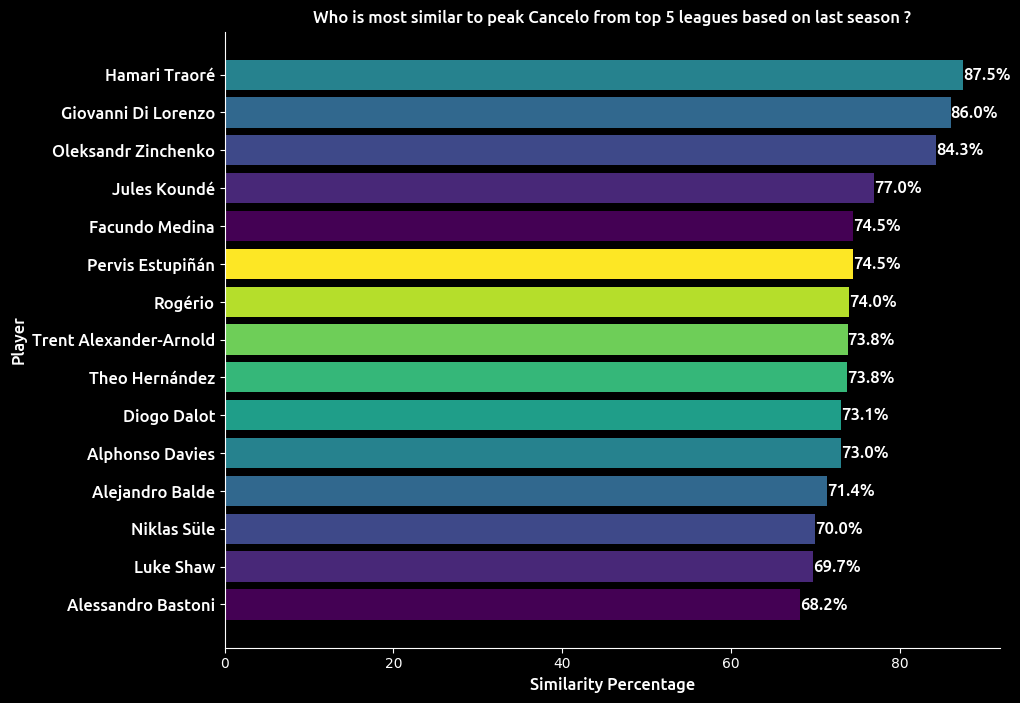

In [41]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2023 DataFrame by similarity_to_cancelo_2023 in descending order
player_2023_sorted = player_2023.sort_values(by='similarity_to_cancelo_2023', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2023_sorted['Player'].head(15)[::-1], (player_2023_sorted['similarity_to_cancelo_2023'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to peak Cancelo from top 5 leagues based on last season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2023_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Cancelo_2022/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
